## Rank histogram plot

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from collections import defaultdict

In [4]:
crawl =  pd.read_csv("feature_csv/US1_site_counts.csv",
                      sep='\t', encoding='utf-8',header=None, names=["sensor", "visit_ids"])

In [5]:
sensor_ranks = defaultdict(set)
df = pd.DataFrame()

for c in crawl.itertuples():
    feat_name = c.sensor.replace("addEventListener_device", "").title()
    sensor_ranks[feat_name].update([int(x) for x in c.visit_ids.split(",")])

def get_bin(visit_id):
    if visit_id < 1000:
        return "[0-1K)"
    elif visit_id < 10000:
        return "[1K-10K)"
    else:
        return "[1K-10K)"

for sensor, visit_ids in sensor_ranks.iteritems():
    for visit_id in visit_ids:
        df = df.append({'sensor':sensor, 'visit_id':visit_id, "rank":get_bin(visit_id)}, ignore_index=True)

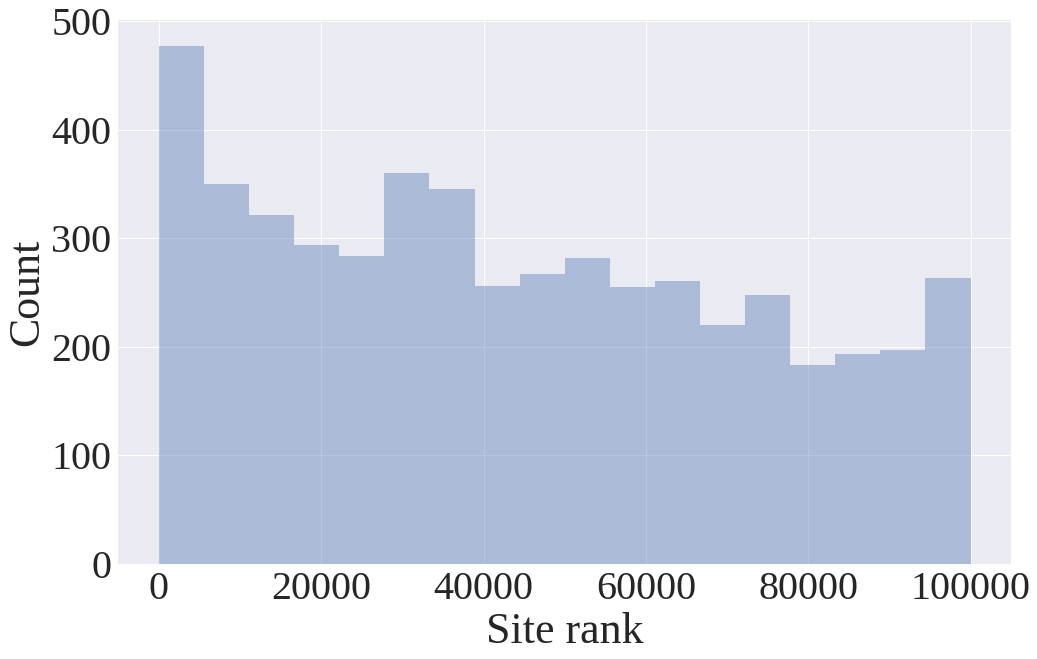

In [16]:
sns.set_style({'font.family': 'Liberation Serif'})
#sns.set_style({'font.family': 'Times New Roman'})
#sns.set_style({'font.family': 'serif'})
#sns.set_style({'font.size': 18})
sns.set_style(rc={"pdf.fonttype": 1, 'pdf.use14corefonts':True, 'text.usetex':True})

sns_plot = sns.distplot(df["visit_id"], kde=False);
#sns_plot.set_axis_labels("$Site rank$", "$Count$");
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 4)


sns_plot.set_xlabel("Site rank")
sns_plot.set_ylabel("Count")
sns_plot.figure.savefig("sensor_access_site_rank_histogram.pdf")
sns_plot.figure.savefig("sensor_access_site_rank_histogram.png")


In [5]:
min(df["visit_id"].unique())

9.0

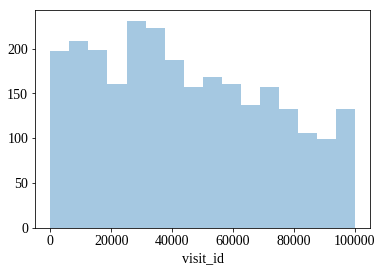

In [6]:
sns.distplot(df[df.sensor=="Motion"]["visit_id"], kde=False);

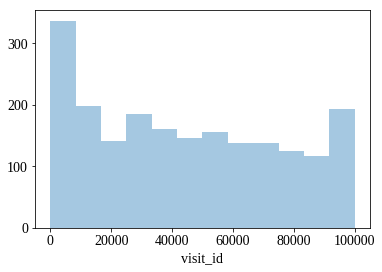

In [7]:
sns.distplot(df[df.sensor=="Orientation"]["visit_id"], kde=False);

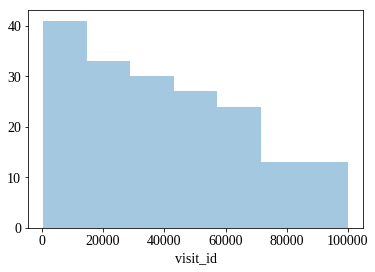

In [8]:
sns.distplot(df[df.sensor=="Light"]["visit_id"], kde=False);

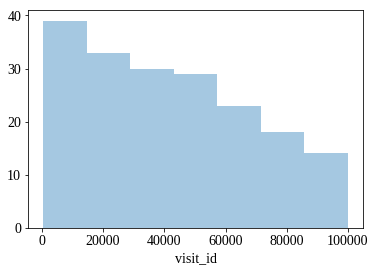

In [9]:
sns.distplot(df[df.sensor=="Proximity"]["visit_id"], kde=False);